In [3]:
import random
import matplotlib.pyplot as plt
# YOU ARE NOT ALLOWED TO IMPORT ANY OTHER LIBRARY PACKAGE

# Theory Part (40 Marks)

Write your solution to Question 1 here. (Double-click this cell, then edit.)

# 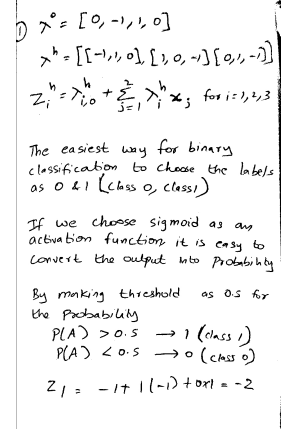

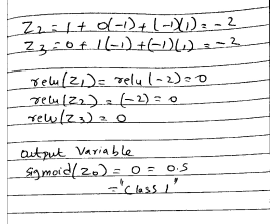

Write your solution to Question 2 here.

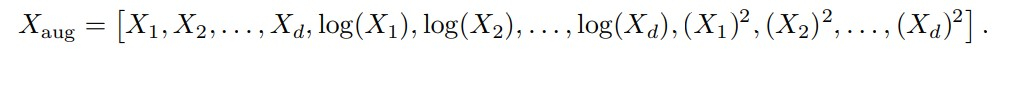


As we are augmenting data with 2 dimensions of length D, 

**the new dimension is 3d**


Augmentation makes the model more linear because it is now able to find more relations which makes it a linear relation, which inturn results in high bias and less variance.


Write your solution to Question 3 here.
# 
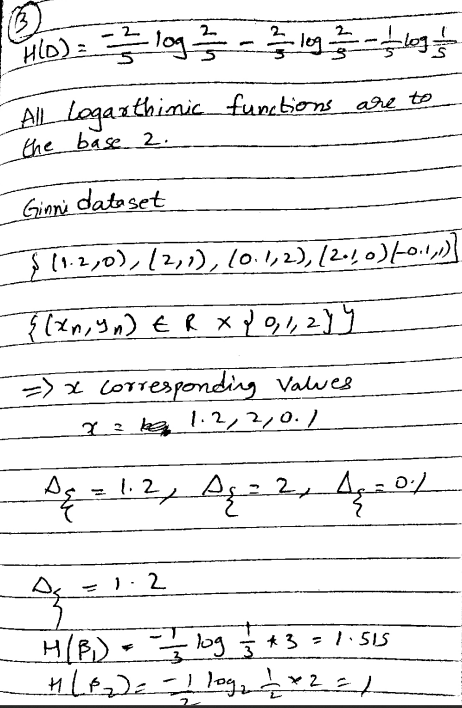


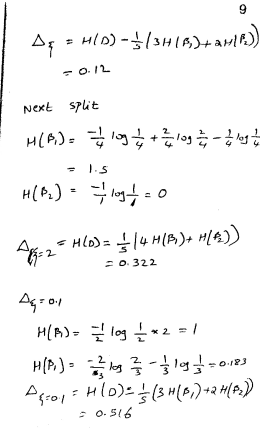

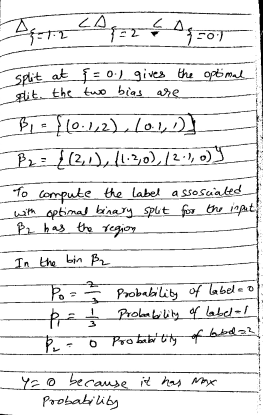

The following code snippet generates a random number, which is used as $p$ in Question 4(a).

In [4]:
print( "The value of p you should use is", random.randrange(2000,6001) )

The value of p you should use is 4936


Write your solution to Question 4(a) here.

random.seed(210)
print( "The value of p you should use is", random.randrange(2000,6001) )

In [5]:
3785**(1/2)

61.5223536610881

Write your solution to Question 4(a) here.

Solution

 The label
of each datapoint is either “cat”, “dog” or “fox”. So This is a classification problem.

If we use random forest for the problem, in each node of each decision tree, and there are p attributes, then a general rule in practice is to sample square root of the number of attributes, which in this case is 61.522


Write your solution to Question 4(b) here.

Write your solution to Question 4(b) here.

In this question we consider a variant of bagging, in which each BTS is generated by sampling 2n datapoints with replacement, 

Thus probability that a particular datapoint is not chosen as the j-th sample is 1−(1/n)	

Similarly for all the 2n samples to be not chosen makes it (1−(1/n) )2n

If n is large, by that if n is greater than 100, then I will be using a popular mathematical approximation

(1−(1/n) )n = 1/e

So in this case, it will become
(1−(1/n) )2n   =  1/ e2

As in this case, n = 500, the probability of BTS sampled is  1 – 1/ e2

P = 0.8646




Write your solution to Question 4(c) here.

Write your solution to Question 4(c) here.

Ensemble methods are designed to improve algorithms which are generally unstable. Instability in algorithms, make bagging work, where are KNN in general is highly stable. 

The following code snippet is for Question 5(a). It generates 8 random datapoints in $\mathbb{R}^2$, and puts them into three clusters initially.

In [6]:
clusters = [1,2,2,2,2,3,3]
random.shuffle(clusters)
for i in range(7):
    print( (random.randrange(0,21), random.randrange(0,21)), "is in Cluster", clusters[i] )

(14, 20) is in Cluster 2
(1, 16) is in Cluster 1
(12, 17) is in Cluster 3
(8, 18) is in Cluster 2
(10, 12) is in Cluster 2
(14, 0) is in Cluster 2
(6, 10) is in Cluster 3


Write your solution to Question 5(a) here.

Write your solution to Question 5(a) here.



Cluster 1: {(14,4)}

Cluster 2 : {(20,9),(20,4),(3,17),(15,3)}

Cluster 3 : { (7,1),(17,2)}

Intially Centroids are 

for C1 is (14,4)

for C2 is (19.5, 8.25)

for C3 is (12, 1.5)

after calculating distances and Running K means


Cluster 1: {(14,4),(15,3), (17,2)}

Cluster 2 : {(20,9),(20,4),(3,17)}

Cluster 3 : { (7,1)}


 After 2nd iteration of running K means


Cluster 1:  {(14,4),(15,3), (17,2)}

Cluster 2: {(20,9),(20,4),(3,17)}

Cluster 3:  Cluster 3 : { (7,1)}



Write your solution to Question 5(b) here.

Write your solution to Question 5(b) here.

The meaning of clusters produced being biased is that, whenever we plot a dendogram for this scenario, the it is an unbalanced  plot, popular called as biased. The primary reason for this is with the usage of single linkage method. The problem primarily arises when the clusters are close enough, it is very difficult deal the proximity issue with single linkage, even if the clusters are far away from each other, there are chances of it being merged, so this creates a bias.



# Practical Part (60 Marks)

In [7]:

# Write your code for Task 1 here
random.seed(210)
data_generated = [[random.randint(-50, 50) for i in range(3)] for j in range(100)] #using randint for random integers

In [9]:
# Write your code for Task 2 here; you may use the following template
def distance(point1, point2):
    # write the content of this function
    # returns a number which is the Euclidean distance between the two points
    return (sum([(pi - qi)**2 for pi, qi in zip(point1, point2)]))**0.5 #avoiding pow which is given in the hint, inorder to improve the speed of function

# ref : https://stackoverflow.com/questions/20969773/exponentials-in-python-xy-vs-math-powx-y#:~:text=pow%20is%20slower%20than%20**%20in%20all%20cases.

In [10]:
# Write your code for Task 3 here; you may use the following template
class Node:
    def __init__(self, x):
        # write the content of the constructor here; this constructor is used to initalize the single-point clusters in AHC
        if type(x[0])==list:
            self.cluster = [xi for xi in x]
        else:
            self.cluster = [x]
        self.height = 0
        self.leftChild = None
        self.rightChild = None

In [11]:
# Write your code for Task 4 here; you may use the following template
def singleLinkage(node1, node2):
    # write the content of this function
    # returns a number which is the single linkage between the two clusters in the two nodes
    return min([distance(i, j) for i in node1.cluster for j in node2.cluster])

def completeLinkage(node1, node2):
    # complete linkage
    return max([distance(i, j) for i in node1.cluster for j in node2.cluster])

def averageLinkage(node1, node2):
    # average linkage
    distances = [distance(i, j) for i in node1.cluster for j in node2.cluster]
    return sum(distances) / len(distances)
    
def centroidLinkage(node1, node2):
    # centroid linkage
    x1, y1, z1 = zip(*node1.cluster)
    x2, y2, z2 = zip(*node2.cluster)
    #USING THE TRADITIONAL Centroid forumula to calculate the centroid of the points
    centroid1 = [sum(x1)/len(x1), sum(y1)/len(y1), sum(z1)/len(z1)]
    centroid2 = [sum(x2)/len(x2), sum(y2)/len(y2), sum(z2)/len(z2)]
    #using the distance function that is already defined 
    return distance(centroid1, centroid2)

In [12]:
# Write your code for Task 5 here; you may use the following template
def clustersToMerge(currentClusters, linkage): # when this function is used, linkage should be one of the four linkage functions you implemented for Task 4
    # write the content of this function
    # returns a tuple (i,j,h) which indicates that the i-th and j-th nodes should be merged next to form a new Node with height h
    h = float('inf')
    for i in range(len(currentClusters)-1):
        for j in range(i+1, len(currentClusters)):
            c_i, c_j = currentClusters[i], currentClusters[j]
            dist = linkage(c_i, c_j)
            if dist < h:
                h, im, jm = dist, i, j
    return (im, jm, h)

In [13]:
# Write your code for Task 6 here; you may use the following template
def ahc(datapoints, linkage):
    # write the content of this function
    # returns the root node of the AHC tree
    currentClusters = [Node(x) for x in datapoints]
    while len(currentClusters)>1:
        (i, j, h) = clustersToMerge(currentClusters, linkage)
        newNode = Node(currentClusters[i].cluster + currentClusters[j].cluster)
        newNode.height = h
        newNode.leftChild = currentClusters[i]
        newNode.rightChild = currentClusters[j]
        newClusters = []
        if len(currentClusters)==2:
            return newNode
        for k in range(len(currentClusters)):
            if k==i or k==j:
                continue
            else:
                newClusters.append(currentClusters[k])
        newClusters.append(newNode)
        currentClusters = newClusters.copy()

In [14]:
# Write your code for Task 7 here; you may use the following template
def cutTree(rootNode, k):
    # write the content of this function
    # returns the k clusters obtained by cutting the AHC tree at an appropriate height
    out = []
    #creating a output list
    if not rootNode:
        return res
    nodes = []
    curr_node = rootNode
    count = 2
    nodes.append((curr_node.leftChild, curr_node.leftChild.height))
    nodes.append((curr_node.rightChild, curr_node.rightChild.height))
    while count<k:
        curr_nodes = max(nodes, key=lambda x:x[1])
        if curr_nodes[1]==0:
            break
        nodes.remove(curr_nodes)
        curr_node = curr_nodes[0]
        if curr_node.leftChild:
            nodes.append((curr_node.leftChild, curr_node.leftChild.height))
        if curr_node.rightChild:
            nodes.append((curr_node.rightChild, curr_node.rightChild.height))
        count += 1
    for node in nodes:
        out.append(node[0].cluster)
        #appending it and return it back
    return out

# Write your code for generating the plots here

# corresponding plots are generated after this

Write your observations from Task 7 here.

**For Plotting I have chosen Single Linkage and Average Linkage**

other linkages can also be used.
 

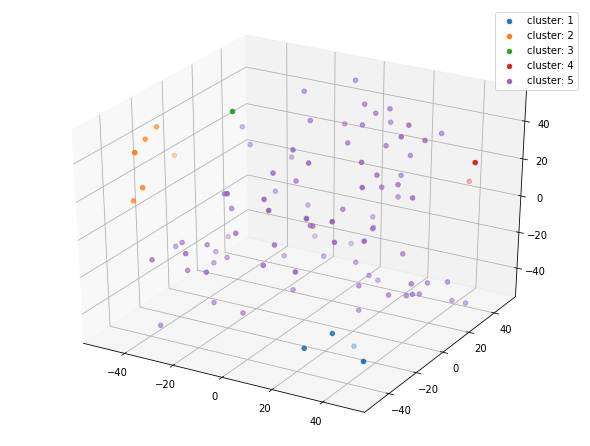

In [15]:
from mpl_toolkits.mplot3d import Axes3D
rootNode = ahc(data_generated, singleLinkage)
out = cutTree(rootNode, k=5)
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
for i in range(len(out)):
  x, y, z = zip(*out[i])
  ax.scatter(x, y, z, label='cluster: ' + str(i+1))
ax.legend()
plt.show()

#https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html

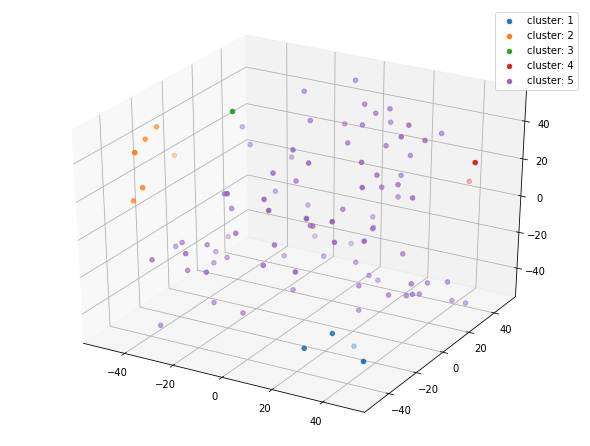

In [16]:
rootNode = ahc(data_generated, averageLinkage)
res = cutTree(rootNode, k=5)
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
for i in range(len(out)):
  x, y, z = zip(*out[i])
  ax.scatter(x, y, z, label='cluster: ' + str(i+1))
ax.legend()
plt.show()
#https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html

Write your observations from Task 7 here.

both single and average are not good models, for further improvement, we can try both centroid and complete linkages.